In [1]:
#1. Import thư viện cần thiết
import pickle
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso
from sklearn import metrics
import sklearn.preprocessing
import datetime
import os
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from sklearn.metrics import mean_squared_error,mean_absolute_error, r2_score

In [60]:
#2. Đọc dữ liệu từ file
df = pd.read_csv('/content/SAMSUNG.csv')

In [61]:
#3. Làm sạch dữ liệu
df['Open'] = df['Open'].replace(0, df['Open'].mean())
df['High'] = df['High'].replace(0, df['High'].mean())
df['Low'] = df['Low'].replace(0, df['Low'].mean())
df['Close'] = df['Close'].replace(0, df['Close'].mean())
df

,Date,Close,Open,High,Low
0,3/4/2019,44850,46000,46100,44800
1,3/5/2019,44250,44600,45100,44150
2,3/6/2019,44000,44000,44300,43700
3,3/7/2019,44450,43400,44950,43400
4,3/8/2019,43800,44450,44800,43800
...,...,...,...,...,...
1542,5/21/2024,78400,78500,79000,78200
1543,5/22/2024,77700,78100,78700,77300
1544,5/23/2024,78300,77700,79100,77100
1545,5/24/2024,75900,76800,77000,75800


In [62]:
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor

# Chọn features và target
X = df[['Open', 'High', 'Low']]
y = df['Close']

train_size = int(0.7 * len(df))
test_size = int(0.3 * len(df))

X_train = X[:train_size]
X_test = X[train_size:]
y_train = y[:train_size]
y_test = y[train_size:]

# Khởi tạo mô hình
model = XGBRegressor()

# Huấn luyện mô hình
model.fit(X_train, y_train)

# Dự đoán kết quả trên tập train và tập test
train_predict = model.predict(X_train)
predictions_xgb = model.predict(X_test)

In [63]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Tính Mean Absolute Error
mae = mean_absolute_error(y_test, predictions_xgb)
print(f"Mean Absolute Error (MAE): {mae}")

# Tính Mean Squared Error
mse = mean_squared_error(y_test, predictions_xgb)
print(f"Mean Squared Error (MSE): {mse}")

# Tính R-squared
r2 = r2_score(y_test, predictions_xgb)
print(f"R-squared (R2): {r2}")

Mean Absolute Error (MAE): 373.0592153897849
Mean Squared Error (MSE): 250634.91115319036
R-squared (R2): 0.9936910047829568


**Dự đoán 30 ngày tiếp theo**

In [64]:
import numpy as np

# Chuyển y_test thành NumPy array trước khi gọi reshape
x_input = X_test.iloc[60].to_numpy().reshape(1, -1)
x_input.shape

temp_input = list(x_input)
temp_input = temp_input[0].tolist()

from numpy import array

lst_output = []
n_steps = 100
i = 0
while(i < 30):

    if(len(temp_input) > 3):
        # Chỉ lấy 3 phần tử cuối cùng
        x_input = np.array(temp_input[-3:])
        print("{} day input {}".format(i, x_input))
        x_input = x_input.reshape((1, -1))
        # Dự đoán
        yhat = model.predict(x_input)
        print("{} day output {}".format(i, yhat))
        temp_input.extend(yhat.tolist())
        temp_input = temp_input[1:]
        lst_output.extend(yhat.tolist())
        i = i + 1
    else:
        x_input = x_input.reshape((1, -1))
        yhat = model.predict(x_input)
        print(yhat[0])
        temp_input.extend(yhat.tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i = i + 1

57906.664
4
1 day input [58700.        57600.        57906.6640625]
1 day output [57175.32]
2 day input [57600.        57906.6640625 57175.3203125]
2 day output [57634.188]
3 day input [57906.6640625 57175.3203125 57634.1875   ]
3 day output [56908.047]
4 day input [57175.3203125 57634.1875    56908.046875 ]
4 day output [57236.79]
5 day input [57634.1875    56908.046875  57236.7890625]
5 day output [56721.66]
6 day input [56908.046875   57236.7890625  56721.66015625]
6 day output [56789.996]
7 day input [57236.7890625  56721.66015625 56789.99609375]
7 day output [56581.08]
8 day input [56721.66015625 56789.99609375 56581.078125  ]
8 day output [56452.72]
9 day input [56789.99609375 56581.078125   56452.71875   ]
9 day output [56442.797]
10 day input [56581.078125 56452.71875  56442.796875]
10 day output [56424.133]
11 day input [56452.71875   56442.796875  56424.1328125]
11 day output [56424.133]
12 day input [56442.796875  56424.1328125 56424.1328125]
12 day output [56424.133]
13 day

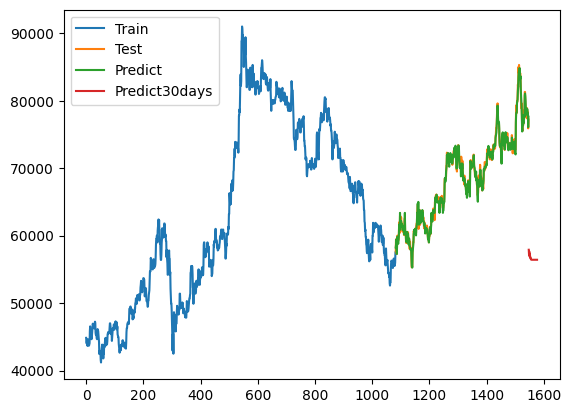

In [65]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
# Plotting
train_data_index = pd.RangeIndex(start=0, stop=train_size, step=1)
plt.plot(train_data_index, y_train)

test_data_index = pd.RangeIndex(start=train_size, stop=train_size + len(y_test), step=1)
plt.plot(test_data_index, y_test)

# Adjusting y_pred to have correct shape and length
test_data_index_pred = pd.RangeIndex(start=train_size, stop=train_size + len(predictions_xgb), step=1)
plt.plot(test_data_index_pred, predictions_xgb)

# Adjusting lst_output to have correct shape and length
prediect_data_index = pd.RangeIndex(start=len(df), stop=len(df) + len(lst_output), step=1)
plt.plot(prediect_data_index, lst_output)

plt.legend(['Train', 'Test', 'Predict', 'Predict30days'])
plt.show()

**Dự đoán 60 ngày tiếp theo**

In [66]:
import numpy as np

# Chuyển y_test thành NumPy array trước khi gọi reshape
x_input = X_test.iloc[60].to_numpy().reshape(1, -1)
x_input.shape

temp_input = list(x_input)
temp_input = temp_input[0].tolist()

from numpy import array

lst_output_60 = []
n_steps = 100
i = 0
while(i < 60):

    if(len(temp_input) > 3):
        # Chỉ lấy 3 phần tử cuối cùng
        x_input = np.array(temp_input[:3])
        print("{} day input {}".format(i, x_input))
        x_input = x_input.reshape((1, -1))
        # Dự đoán
        yhat = model.predict(x_input)
        print("{} day output {}".format(i, yhat))
        temp_input.extend(yhat.tolist())
        temp_input = temp_input[1:]
        lst_output_60.extend(yhat.tolist())
        i = i + 1
    else:
        x_input = x_input.reshape((1, -1))
        yhat = model.predict(x_input)
        print(yhat[0])
        temp_input.extend(yhat.tolist())
        print(len(temp_input))
        lst_output_60.extend(yhat.tolist())
        i = i + 1

57906.664
4
1 day input [58100 58700 57600]
1 day output [57906.664]
2 day input [58700.        57600.        57906.6640625]
2 day output [57175.32]
3 day input [57600.        57906.6640625 57906.6640625]
3 day output [58010.836]
4 day input [57906.6640625 57906.6640625 57175.3203125]
4 day output [57450.094]
5 day input [57906.6640625 57175.3203125 58010.8359375]
5 day output [57005.7]
6 day input [57175.3203125 58010.8359375 57450.09375  ]
6 day output [58059.945]
7 day input [58010.8359375  57450.09375    57005.69921875]
7 day output [56565.73]
8 day input [57450.09375    57005.69921875 58059.9453125 ]
8 day output [57156.484]
9 day input [57005.69921875 58059.9453125  56565.73046875]
9 day output [57362.88]
10 day input [58059.9453125  56565.73046875 57156.484375  ]
10 day output [56555.293]
11 day input [56565.73046875 57156.484375   57362.87890625]
11 day output [56877.766]
12 day input [57156.484375   57362.87890625 56555.29296875]
12 day output [56500.594]
13 day input [57362.8

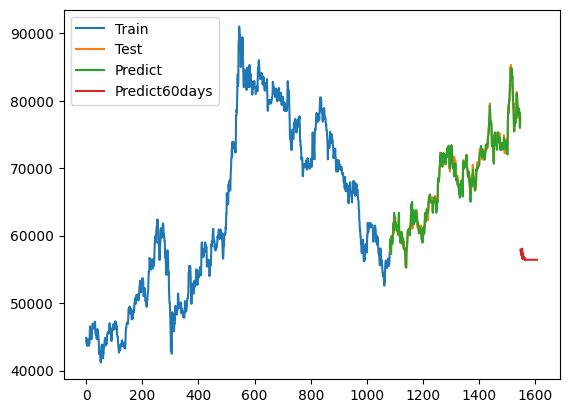

In [67]:
# Plotting
train_data_index = pd.RangeIndex(start=0, stop=train_size, step=1)
plt.plot(train_data_index, y_train)

test_data_index = pd.RangeIndex(start=train_size, stop=train_size + len(y_test), step=1)
plt.plot(test_data_index, y_test)

# Adjusting y_pred to have correct shape and length
test_data_index_pred = pd.RangeIndex(start=train_size, stop=train_size + len(predictions_xgb), step=1)
plt.plot(test_data_index_pred, predictions_xgb)

# Adjusting lst_output_60 to have correct shape and length
prediect_data_index = pd.RangeIndex(start=len(df), stop=len(df) + len(lst_output_60), step=1)
plt.plot(prediect_data_index, lst_output_60)

plt.legend(['Train', 'Test', 'Predict', 'Predict60days'])
plt.show()

**Dự đoán 90 ngày tiếp theo**

In [68]:
import numpy as np

# Chuyển y_test thành NumPy array trước khi gọi reshape
x_input = X_test.iloc[60].to_numpy().reshape(1, -1)
x_input.shape

temp_input = list(x_input)
temp_input = temp_input[0].tolist()

from numpy import array

lst_output_90 = []
n_steps = 100
i = 0
while(i < 90):

    if(len(temp_input) > 3):
        # Chỉ lấy 3 phần tử cuối cùng
        x_input = np.array(temp_input[-3:])
        print("{} day input {}".format(i, x_input))
        x_input = x_input.reshape((1, -1))
        # Dự đoán
        yhat = model.predict(x_input)
        print("{} day output {}".format(i, yhat))
        temp_input.extend(yhat.tolist())
        temp_input = temp_input[1:]
        lst_output_90.extend(yhat.tolist())
        i = i + 1
    else:
        x_input = x_input.reshape((1, -1))
        yhat = model.predict(x_input)
        print(yhat[0])
        temp_input.extend(yhat.tolist())
        print(len(temp_input))
        lst_output_90.extend(yhat.tolist())
        i = i + 1

57906.664
4
1 day input [58700.        57600.        57906.6640625]
1 day output [57175.32]
2 day input [57600.        57906.6640625 57175.3203125]
2 day output [57634.188]
3 day input [57906.6640625 57175.3203125 57634.1875   ]
3 day output [56908.047]
4 day input [57175.3203125 57634.1875    56908.046875 ]
4 day output [57236.79]
5 day input [57634.1875    56908.046875  57236.7890625]
5 day output [56721.66]
6 day input [56908.046875   57236.7890625  56721.66015625]
6 day output [56789.996]
7 day input [57236.7890625  56721.66015625 56789.99609375]
7 day output [56581.08]
8 day input [56721.66015625 56789.99609375 56581.078125  ]
8 day output [56452.72]
9 day input [56789.99609375 56581.078125   56452.71875   ]
9 day output [56442.797]
10 day input [56581.078125 56452.71875  56442.796875]
10 day output [56424.133]
11 day input [56452.71875   56442.796875  56424.1328125]
11 day output [56424.133]
12 day input [56442.796875  56424.1328125 56424.1328125]
12 day output [56424.133]
13 day

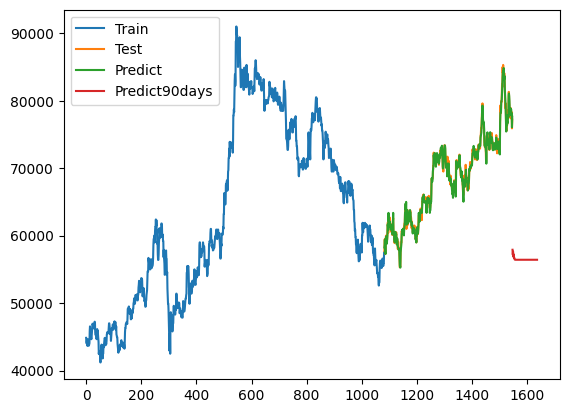

In [69]:
# Plotting
train_data_index = pd.RangeIndex(start=0, stop=train_size, step=1)
plt.plot(train_data_index, y_train)

test_data_index = pd.RangeIndex(start=train_size, stop=train_size + len(y_test), step=1)
plt.plot(test_data_index, y_test)

# Adjusting y_pred to have correct shape and length
test_data_index_pred = pd.RangeIndex(start=train_size, stop=train_size + len(predictions_xgb), step=1)
plt.plot(test_data_index_pred, predictions_xgb)

# Adjusting lst_output_60 to have correct shape and length
prediect_data_index = pd.RangeIndex(start=len(df), stop=len(df) + len(lst_output_90), step=1)
plt.plot(prediect_data_index, lst_output_90)

plt.legend(['Train', 'Test', 'Predict', 'Predict90days'])
plt.show()